## **5. Metody Modelowania**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_for_modeling = pd.read_csv('data_for_modeling.csv')

data_for_modeling.head(5)

,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Land.Contour,Lot.Config,Neighborhood,Condition.1,Condition.2,...,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Misc.Feature,Sale.Type,Sale.Condition,SalePrice
0,RL,34,3901,Pave,NaN,Lvl,Inside,NridgHt,Norm,Norm,...,631,3,3,Y,110,50,NaN,New,Partial,204000
1,RL,70,8400,Pave,NaN,Lvl,Corner,Nonemes,Norm,Norm,...,525,3,3,Y,240,0,NaN,WD,Normal,126000
2,RL,60,7200,Pave,NaN,Lvl,Inside,CollgCr,Norm,Norm,...,396,3,3,Y,192,0,NaN,WD,Normal,133900
3,RL,64,7018,Pave,NaN,Bnk,Inside,SawyerW,Norm,Norm,...,400,3,3,Y,0,0,NaN,WD,Alloca,118858
4,RL,111,16259,Pave,NaN,Lvl,Corner,NridgHt,Norm,Norm,...,840,3,3,Y,240,154,NaN,New,Partial,342643


Przed przystąpieniem do modelowania pozostałe dane kategoryczne zamienię na dane numeryczne. Wykorzystam do tego modułu`'LabelEncoder'`

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [4]:
# wczytuję listę kolumn gdzie wystepują dane kategoryczne
data_cat = list(data_for_modeling.select_dtypes(exclude=["number", 'float']).columns)
data_cat

['MS.Zoning',
 'Street',
 'Alley',
 'Land.Contour',
 'Lot.Config',
 'Neighborhood',
 'Condition.1',
 'Condition.2',
 'Bldg.Type',
 'House.Style',
 'Roof.Style',
 'Roof.Matl',
 'Exterior.1st',
 'Exterior.2nd',
 'Mas.Vnr.Type',
 'Foundation',
 'Heating',
 'Functional',
 'Garage.Type',
 'Paved.Drive',
 'Misc.Feature',
 'Sale.Type',
 'Sale.Condition']

In [5]:
for i in data_cat:
    data_for_modeling[i] = preprocessing.LabelEncoder().fit_transform(data_for_modeling[i].astype('str'))

In [6]:
# sprawdzam czy zadziałał LabelEncoder w pierwszej kolejności dla kolumn gdzie były wartości kategoryczne
data_for_modeling[data_cat].head(3)

,MS.Zoning,Street,Alley,Land.Contour,Lot.Config,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,...,Exterior.2nd,Mas.Vnr.Type,Foundation,Heating,Functional,Garage.Type,Paved.Drive,Misc.Feature,Sale.Type,Sale.Condition
0,5,1,2,3,4,18,2,2,3,2,...,13,3,2,1,6,1,2,4,6,5
1,5,1,2,3,0,17,2,2,0,2,...,10,4,1,1,6,1,2,4,9,4
2,5,1,2,3,4,5,2,2,0,6,...,6,4,1,1,6,5,2,4,9,4


In [7]:
# wczytam jeszcze raz cały zestaw danych, aby się upewnić czy nie ma danych kategorycznych
data_for_modeling.head(3)

,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Land.Contour,Lot.Config,Neighborhood,Condition.1,Condition.2,...,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Misc.Feature,Sale.Type,Sale.Condition,SalePrice
0,5,34,3901,1,2,3,4,18,2,2,...,631,3,3,2,110,50,4,6,5,204000
1,5,70,8400,1,2,3,0,17,2,2,...,525,3,3,2,240,0,4,9,4,126000
2,5,60,7200,1,2,3,4,5,2,2,...,396,3,3,2,192,0,4,9,4,133900


***
W pierwszym kroku zajmę się podziałem data setu na zestaw treningowy i testowy. Znim jednka to zrobię podzielę zbior danych na zbiór gdzie jest `'SalePrice'` (zmienna objaśniana) i zbiór gdzie są pozostałe zmienne.


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# dziele zbiory na zbiór gdzie jest 'SalePrice' (zmienna objaśniana) i zbiór gdzie są pozostałe zmienne
X = data_for_modeling.copy().drop('SalePrice', axis = 1)
y = data_for_modeling.SalePrice.copy()

X.head(3)

,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Land.Contour,Lot.Config,Neighborhood,Condition.1,Condition.2,...,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Misc.Feature,Sale.Type,Sale.Condition
0,5,34,3901,1,2,3,4,18,2,2,...,2,631,3,3,2,110,50,4,6,5
1,5,70,8400,1,2,3,0,17,2,2,...,2,525,3,3,2,240,0,4,9,4
2,5,60,7200,1,2,3,4,5,2,2,...,1,396,3,3,2,192,0,4,9,4


In [10]:
# podział data setu na zestaw treningowy i testowy za pomoca moduły train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# po podzilenieu na zestaw testowy i treningowy sprawdzę wymiary zestawów danych
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1993, 56)
(1993,)
(1335, 56)
(1335,)
(658, 56)
(658,)


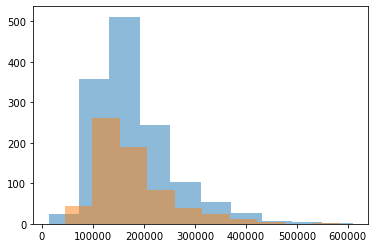

In [12]:
# wizualizacja rozkładu zmiennej obiaśnianej w zestawie testowym i treningowym 
plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

***

W kolejnym kroku zajmę się przeskalowaniem danych za pomocą modułu StandardScaler.

Standaryzacja bedzie dotyczyła wszystkich zminnych. Polega na przekształceniu danych, aby ich rozkład miał średnią wartośc równą 0 i odchylenie standardowe równe 1.

In [13]:
# wykorzystam moduł StandardScaler z pakietu sklearn w celu przeskalowania danych
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

W celu przyśpieszenia procesu uczenia modelu można wykonać redukcję wymiarowości. W tym celu wyznaczenia optymalnej liczby komponentów wykorzystam moduł PCA (Principal Component Analysis).

W pierwszym podejściu nie zastosowałem PCA przed rozpoczeciem trenowania modelu co istotnie wpłyneło na czas trenowani modelu.

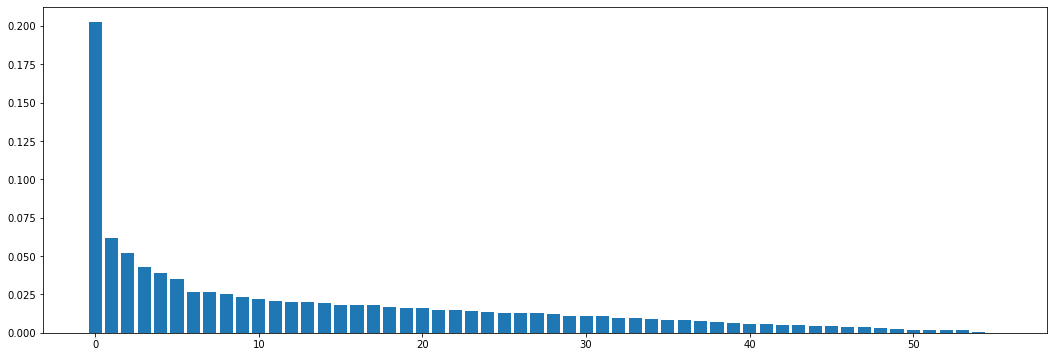

In [14]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X_train_scaled)
plt.figure(figsize=(18,6))
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

In [15]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=4, random_state=42)    # ustawiam 5 podziałów
pca = PCA(random_state=42, n_components=15)    # ustawiam 16 komponentów
scaler = StandardScaler()
print("",kfold,"\n",scaler)


 KFold(n_splits=4, random_state=42, shuffle=False) 
 StandardScaler()


/Users/m.owczarek/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


***
Przytąpie teraz to wytrenowania kilku modeli. 

Dla każdego z modeli wykonam pipeline danych, które stworzę za pomocą modułu `make_pipeline`. Dodatkowo w celu znalezienia najlepszych parametrów dla modelu wykorzystam moduł `GridSearchCV`.

W celu oceny graficzej predykcji modelu. Dla każdego modelu przygotuję wykres rozrzutu reszt cząstowych (`Residuals Plot`), ktory pokazuje różnice między wartościami testowymi, a wartościami przewidywanymi *(reszty to różnice między wartościami obserwowanymi, a obliczonymi na podstawie wybranego modelu)*.

Za pomocą tego wykresu możemy zobaczyć zakres, w jakim nasz model uchwycił zachowanie danych.  Wizualizując reszty dla serii wystąpień, możemy sprawdzić, czy są one zgodne z przypadkowym błędem. Jeśli punkty danych wydają się być równomiernie (losowo) rozproszone wokół wykreślonej linii, nasz model działa dobrze.



In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


* Model Regresji Liniowej

In [17]:
from sklearn import linear_model

In [18]:

param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4]}

polynomialfeatures = PolynomialFeatures()

linearregression = linear_model.LinearRegression()

pipeline = make_pipeline(scaler, 
                         pca,
                         polynomialfeatures, 
                         linearregression)

grid_lr = GridSearchCV(estimator=pipeline, 
                       param_grid=param_grid, 
                       cv=kfold, 
                       refit=True, 
                       scoring='r2')

grid_lr.fit(X_train,y_train)

print("Best parameters: ", grid_lr.best_params_)
print('----')
print("Train R2: {:.5f}".format( metrics.r2_score(y_train, grid_lr.predict(X_train))))
print("Test R2: {:.5f}".format( metrics.r2_score(y_pred = grid_lr.predict(X_test), y_true= y_test)))

Best parameters:  {'polynomialfeatures__degree': 2}
----
Train R2: 0.92784
Test R2: 0.90557


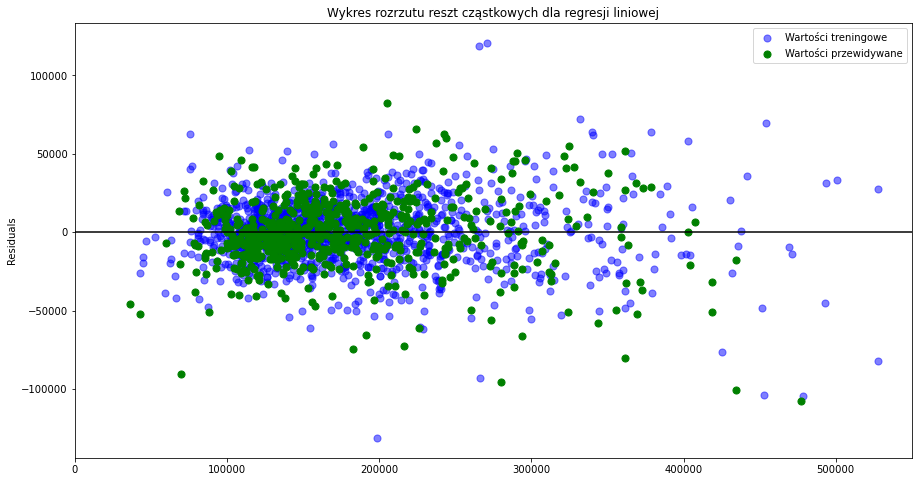

In [19]:
# Wykres rozrzutu reszt cząstkowych dla regresji liniowej

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()

train = ax.scatter(grid_lr.predict(X_train), grid_lr.predict(X_train)-y_train,color='blue',s=50,alpha=0.5)
test = ax.scatter(grid_lr.predict(X_test), grid_lr.predict(X_test)-y_test, s=50, color='green')

ax.hlines(y=0, xmin=0, xmax=550000, color='black')
#ax.set_title('LR')
ax.set_ylabel('Residuals')
ax.set_xlim(0,550000)  
#ax.set_ylim(-150000,150000) # nie ustawiam zakresu, ponieważ wykres sam dopasuje zakres do owartości

plt.title('Wykres rozrzutu reszt cząstkowych dla regresji liniowej')
plt.legend([train, test], ['Wartości treningowe', 'Wartości przewidywane'])


plt.show()

* Model Regresji ElasticNet

In [20]:
from sklearn.linear_model import ElasticNet

In [21]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4], 
              'elasticnet__alpha': [0.001, 0.01, 0.05, 0.1, 1, 10]}

polynomialfeatures = PolynomialFeatures()

elasticnet = ElasticNet(alpha=1, tol=0.1, random_state=42)

pipeline = make_pipeline(scaler, 
                         pca, 
                         polynomialfeatures, 
                         elasticnet)

grid_en = GridSearchCV(estimator=pipeline, 
                       param_grid=param_grid, 
                       cv=kfold, 
                       refit=True, 
                       scoring='r2')

grid_en.fit(X_train,y_train)


print("Best parameters: ", grid_en.best_params_)
print('----')
print("Train R2: {:.5f}".format( metrics.r2_score(y_train, grid_en.predict(X_train))))
print("Test R2: {:.5f}".format( metrics.r2_score(y_pred = grid_en.predict(X_test), y_true= y_test)))

Best parameters:  {'elasticnet__alpha': 1, 'polynomialfeatures__degree': 2}
----
Train R2: 0.92311
Test R2: 0.90885


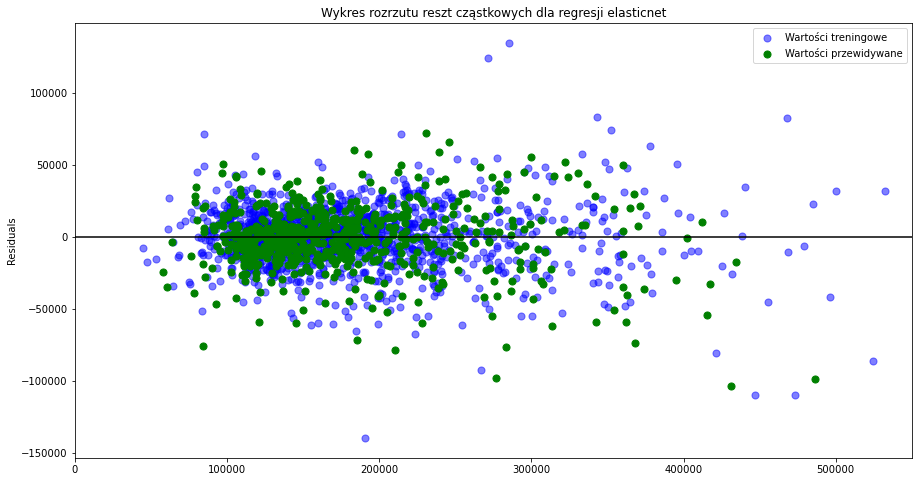

In [22]:
# Wykres rozrzutu reszt cząstkowych dla regresji elasticnet

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()

train = ax.scatter(grid_en.predict(X_train), grid_en.predict(X_train)-y_train,color='blue',s=50,alpha=0.5)
test = ax.scatter(grid_en.predict(X_test), grid_en.predict(X_test)-y_test, s=50, color='green')

ax.hlines(y=0, xmin=0, xmax=550000, color='black')
ax.set_ylabel('Residuals')
ax.set_xlim(0,550000)  
#ax.set_ylim(-150000,150000) # nie ustawiam zakresu, ponieważ wykres sam dopasuje zakres do owartości

plt.title('Wykres rozrzutu reszt cząstkowych dla regresji elasticnet')
plt.legend([train, test], ['Wartości treningowe', 'Wartości przewidywane'])

plt.show()    

* Model Regresji Ridge (regresji grzbietowej)

In [23]:
from sklearn.linear_model import Ridge

In [24]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4], 
             'ridge__alpha': [1, 10, 50, 100, 500, 1000]}

polynomialfeatures = PolynomialFeatures()

ridge = Ridge(alpha=1,  tol=0.1, random_state=42)

pipeline = make_pipeline(scaler, 
                         pca, 
                         polynomialfeatures, 
                         ridge)

grid_rdg = GridSearchCV(estimator=pipeline, 
                        param_grid=param_grid, 
                        cv=kfold, 
                        refit=True, 
                        scoring='r2')

grid_rdg.fit(X_train,y_train)

print("Best parameters: ", grid_rdg.best_params_)
print('----')
print("Train R2: {:.5f}".format( metrics.r2_score(y_train, grid_rdg.predict(X_train))))
print("Test R2: {:.5f}".format( metrics.r2_score(y_pred = grid_rdg.predict(X_test), y_true= y_test)))

Best parameters:  {'polynomialfeatures__degree': 2, 'ridge__alpha': 500}
----
Train R2: 0.92399
Test R2: 0.90823


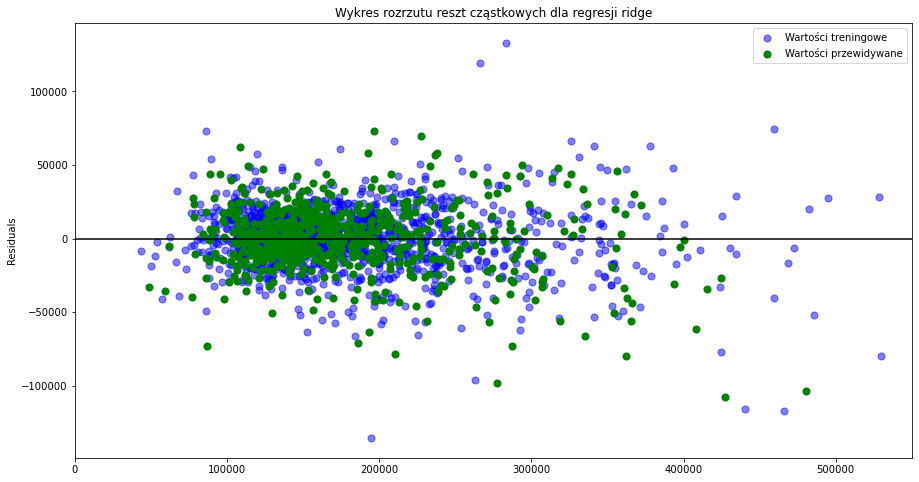

In [25]:
# Wykres rozrzutu reszt cząstkowych dla regresji ridge

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()

train = ax.scatter(grid_rdg.predict(X_train), grid_rdg.predict(X_train)-y_train,color='blue',s=50,alpha=0.5)
test = ax.scatter(grid_rdg.predict(X_test), grid_rdg.predict(X_test)-y_test, s=50, color='green')

ax.hlines(y=0, xmin=0, xmax=550000, color='black')
ax.set_ylabel('Residuals')
ax.set_xlim(0,550000)  
#ax.set_ylim(-150000,150000) # nie ustawiam zakresu, ponieważ wykres sam dopasuje zakres do owartości

plt.title('Wykres rozrzutu reszt cząstkowych dla regresji ridge')
plt.legend([train, test], ['Wartości treningowe', 'Wartości przewidywane'])

plt.show()  

* Model Regresji Lasso

In [26]:
from sklearn.linear_model import Lasso

In [27]:
param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                      'lasso__alpha': [1., 2., 3.]},

polynomialfeatures = PolynomialFeatures()

lasso = Lasso(alpha=1, tol=0.1)

pipeline = make_pipeline(scaler, 
                         pca, 
                         polynomialfeatures, 
                         lasso)

grid_lasso = GridSearchCV(estimator=pipeline,
                          param_grid=param_grid,
                          cv=kfold,
                          refit=True,
                          scoring='r2')

grid_lasso.fit(X_train,y_train)


print("Best parameters: ", grid_lasso.best_params_)
print('----')
print("Train R2: {:.5f}".format( metrics.r2_score(y_train, grid_lasso.predict(X_train))))
print("Test R2: {:.5f}".format( metrics.r2_score(y_pred = grid_lasso.predict(X_test), y_true= y_test)))

Best parameters:  {'lasso__alpha': 3.0, 'polynomialfeatures__degree': 2}
----
Train R2: 0.92258
Test R2: 0.90417


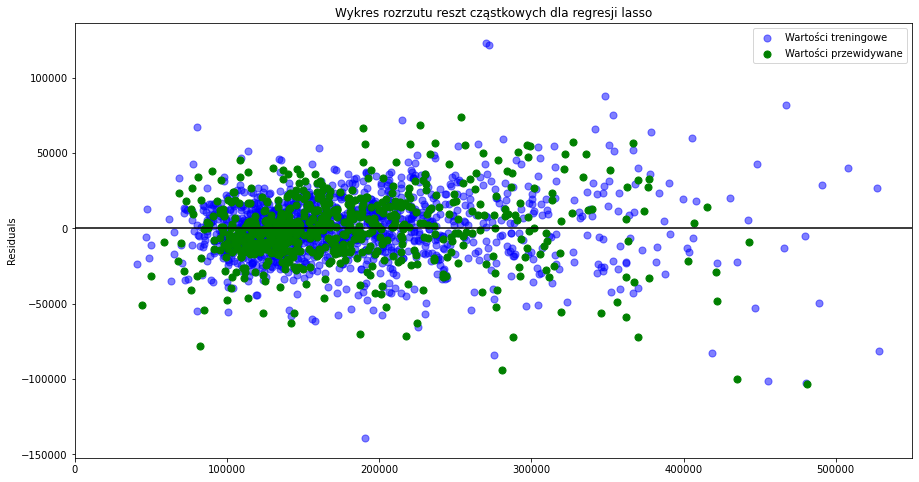

In [28]:
# Wykres rozrzutu reszt cząstkowych dla regresji lasso

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()

train = ax.scatter(grid_lasso.predict(X_train), grid_lasso.predict(X_train)-y_train,color='blue',s=50,alpha=0.5)
test = ax.scatter(grid_lasso.predict(X_test), grid_lasso.predict(X_test)-y_test, s=50, color='green')

ax.hlines(y=0, xmin=0, xmax=550000, color='black')
ax.set_ylabel('Residuals')
ax.set_xlim(0,550000)  
#ax.set_ylim(-150000,150000) # nie ustawiam zakresu, ponieważ wykres sam dopasuje zakres do owartości

plt.title('Wykres rozrzutu reszt cząstkowych dla regresji lasso')
plt.legend([train, test], ['Wartości treningowe', 'Wartości przewidywane'])

plt.show()  

* Model Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
param_grid = {'randomforestregressor__n_estimators': [250, 500, 750, 1000], 
              'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],}

rfr = RandomForestRegressor(n_jobs=-1,
                            oob_score = True,
                            random_state=42) 

pipeline = make_pipeline(scaler, 
                         pca, 
                         rfr)

grid_rf = GridSearchCV(estimator=pipeline, 
                       param_grid=param_grid, 
                       cv=kfold, refit=True, 
                       scoring='r2')

grid_rf.fit(X_train,y_train)


print("Best parameters: ", grid_rf.best_params_)
print('----')
print("Train R2: {:.5f}".format( metrics.r2_score(y_train, grid_rf.predict(X_train))))
print("Test R2: {:.5f}".format( metrics.r2_score(y_pred = grid_rf.predict(X_test), y_true= y_test)))

Best parameters:  {'randomforestregressor__max_features': 'auto', 'randomforestregressor__n_estimators': 1000}
----
Train R2: 0.98189
Test R2: 0.89753


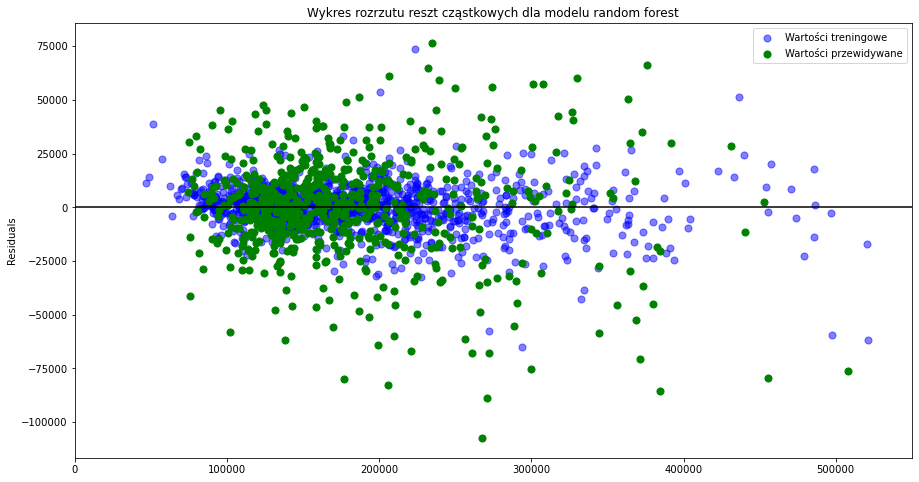

In [31]:
# Wykres rozrzutu reszt cząstkowych dla modelu random forest

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()

train = ax.scatter(grid_rf.predict(X_train), grid_rf.predict(X_train)-y_train,color='blue',s=50,alpha=0.5)
test = ax.scatter(grid_rf.predict(X_test), grid_rf.predict(X_test)-y_test, s=50, color='green')

ax.hlines(y=0, xmin=0, xmax=550000, color='black')
ax.set_ylabel('Residuals')
ax.set_xlim(0,550000)  
#ax.set_ylim(-150000,150000) # nie ustawiam zakresu, ponieważ wykres sam dopasuje zakres do owartości

plt.title('Wykres rozrzutu reszt cząstkowych dla modelu random forest')
plt.legend([train, test], ['Wartości treningowe', 'Wartości przewidywane'])

plt.show()  

* Model Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
param_grid = {'gradientboostingregressor__n_estimators': [250, 500, 750, 1000], 
              'gradientboostingregressor__max_features': ['auto', 'sqrt', 'log2']}

gbr = GradientBoostingRegressor(n_estimators=600,
                                max_depth=5,
                                learning_rate=0.01,
                                min_samples_split=3) 

pipeline = make_pipeline(scaler, 
                         pca, 
                         gbr)

grid_gbr = GridSearchCV(estimator=pipeline, 
                       param_grid=param_grid, 
                       cv=kfold, refit=True, 
                       scoring='r2')

grid_gbr.fit(X_train,y_train)


print("Best parameters: ", grid_gbr.best_params_)
print('----')
print("Train R2: {:.5f}".format( metrics.r2_score(y_train, grid_gbr.predict(X_train))))
print("Test R2: {:.5f}".format( metrics.r2_score(y_pred = grid_gbr.predict(X_test), y_true= y_test)))

Best parameters:  {'gradientboostingregressor__max_features': 'auto', 'gradientboostingregressor__n_estimators': 750}
----
Train R2: 0.98043
Test R2: 0.90257


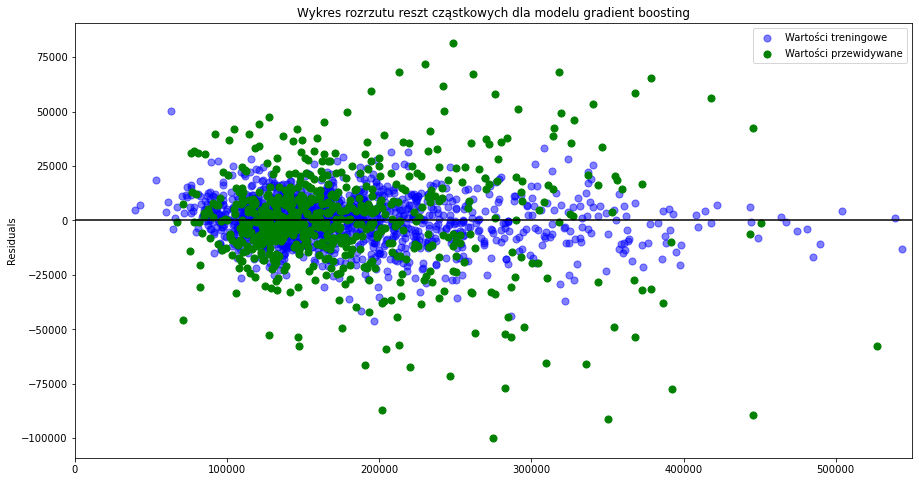

In [34]:
# Wykres rozrzutu reszt cząstkowych dla modelu gradient boosting

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()

train = ax.scatter(grid_gbr.predict(X_train), grid_gbr.predict(X_train)-y_train,color='blue',s=50,alpha=0.5)
test = ax.scatter(grid_gbr.predict(X_test), grid_gbr.predict(X_test)-y_test, s=50, color='green')

ax.hlines(y=0, xmin=0, xmax=550000, color='black')
ax.set_ylabel('Residuals')
ax.set_xlim(0,550000)  
#ax.set_ylim(-150000,150000) # nie ustawiam zakresu, ponieważ wykres sam dopasuje zakres do owartości

plt.title('Wykres rozrzutu reszt cząstkowych dla modelu gradient boosting')
plt.legend([train, test], ['Wartości treningowe', 'Wartości przewidywane'])

plt.show()  

**Metryki**

Pakiet scikit-learn posiada dużą ilość miar, które możemy wykorzystać do analizy wyników uzyskanych przez model.
<br>https://scikit-learn.org/stable/modules/model_evaluation.html

In [35]:
modele = []
modele.append(('LinearRegression', grid_lr.best_estimator_))
modele.append(('ElasticNet', grid_en.best_estimator_))
modele.append(('Ridge', grid_rdg.best_estimator_))
modele.append(('Lasso', grid_lasso.best_estimator_))
modele.append(('RandomForestRegressor', grid_rf.best_estimator_))
modele.append(('GradientBoostingRegressor', grid_gbr.best_estimator_))

In [36]:
from sklearn import  metrics 
from sklearn.metrics import r2_score

r2_train = []
r2_test = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []

for name, model in modele:
    print('---')
    print(name)
    print("R^2 (train): {}".format(metrics.r2_score(y_train, model.predict(X_train)) ))
    print("R^2 (test): {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
   
    r2_train.append(metrics.r2_score(y_train, model.predict(X_train)))
    r2_test.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

---
LinearRegression
R^2 (train): 0.9278359766635519
R^2 (test): 0.9055718005607399
Explained variance score: 0.9055967509211819
Median absolute error: 12247.963862003977
Mean squared error: 515522808.72130775
Mean absolute errors: 16603.591790836166
---
ElasticNet
R^2 (train): 0.9231121421106587
R^2 (test): 0.9088481565387134
Explained variance score: 0.9089148894084541
Median absolute error: 11738.107367398778
Mean squared error: 497635818.9643735
Mean absolute errors: 16045.230144966556
---
Ridge
R^2 (train): 0.923985984506196
R^2 (test): 0.908226566425637
Explained variance score: 0.9082521644376393
Median absolute error: 11297.392050217706
Mean squared error: 501029337.88000935
Mean absolute errors: 16106.557573994727
---
Lasso
R^2 (train): 0.922575882807875
R^2 (test): 0.9041704171551693
Explained variance score: 0.9042374754974423
Median absolute error: 12579.662153915764
Mean squared error: 523173543.4978388
Mean absolute errors: 16691.575266297237
---
RandomForestRegressor
R^2

In [37]:
wyniki = pd.DataFrame(data=modele)

wyniki.rename({0 : 'Name', 1 : 'Model'}, axis = 1, inplace=True)
wyniki.drop(labels=['Model'], axis=1, inplace=True)
wyniki.set_index('Name', inplace=True)

wyniki['R2 (train)'] = r2_train
wyniki['R2 (test)'] = r2_test
wyniki['(EVS)  Explained variance score (test)'] = explained_variance_score
wyniki['(MedAE)  Median absolute error (test)'] = median_absolute_error
wyniki['(MSE)  Mean squared error (test)'] = mean_squared_error
wyniki['(MAE)  Mean absolute errors (test)'] = mean_absolute_error
wyniki

,R2 (train),R2 (test),(EVS) Explained variance score (test),(MedAE) Median absolute error (test),(MSE) Mean squared error (test),(MAE) Mean absolute errors (test)
Name,,,,,,
LinearRegression,0.927836,0.905572,0.905597,12247.963862,5.155228e+08,16603.591791
ElasticNet,0.923112,0.908848,0.908915,11738.107367,4.976358e+08,16045.230145
Ridge,0.923986,0.908227,0.908252,11297.392050,5.010293e+08,16106.557574
Lasso,0.922576,0.904170,0.904237,12579.662154,5.231735e+08,16691.575266
RandomForestRegressor,0.981890,0.897527,0.897534,12049.289000,5.594411e+08,16931.339085
GradientBoostingRegressor,0.980430,0.902565,0.902568,10892.742722,5.319374e+08,16345.673885


## **5. Podsumowanie wyników i wnioski**

* Podsumowanie wyników


Finalnie najlepsze wyniki osiągnął model `ElasticNet` *Wskaźnik **R2** oznacza jak dobrzez przyszłe wartości będą przewidywane przez model*. 
Na zbiorze testowym najlepsze wyniki osiagnął model `RandomForest` i `GradientBoosting`. Wydaje się, że może to wynikaź z overfitingu modelu.

Różnice są nie wielkie, na tyle, że przy innym podziale zestawu danych na zestaw treningowy i testowy wyniki mogłyby się zmienić. 

Także wartość **MAE** pokazuję, że model ElasticNet mylił sie najmniej *wskaźnik **MAE** oznacza dystans pomiędzy przewidywanymi, a aktualnymi wartościami*

**Wnioski i przemyślenia**:

- Realizacja projektu pozwoliła na ustrukturyzowanie wiedzy i pozwoliła na praktyczne przetestowanie i wykorzytanie konceptów, które omawiliśmy podczas bootcampu.

- Jednym z największych wyzwań było dla mnie ustalenie odpowiedniego flow dla całago projektu tj. jakie działania wykonać w pierwszej kolejności, jak dane działania będą wpływały na kolejne kroki (zarówno na etapie czyszczenia i anlizay danych jak i na etapie modelowania).

- Odpowiednie zrozumienie danych jest kluczowe dla projektu. W data secie były niespojności na pozimie słowników np.: wystęowały wartości słownikowe NA oraz None, które po odpowednim połączeniu z innymi zmiennymi można zamienić.

- Istotne okazało się zamienienie zmiennych porządkowych na zmienne numeryczne, ponieważ wpłyneło to na korelacje między zmienna objaśnianą, a pozostałymi zmiennymi (tj.: zmienne porządkowe miały istotny wpływ na zmienną objaśnianą). 

- W pierwszej wersji projektu wykorzystałem także bibliotekę Pandas Profiling Report, która pozwala na kompleksową eksloracyjną analizę danych. Wynik tej analizy jest dostępny z poziomu jupyter notebook'a w iframe przez co jest możliwośc jego oglądania tylko kiedy nootbook działa. Jest możliowść zrzuucenia wyniku anlizy do raportu w formacie .html, ale ten plik miał ponad 45MB. Finalnie zrezygnowałem z wykorzystania tej biblioteki, ponieważ wszystkie anlizy wykonałem samodzielnie, ale z pewnościa jest to interesujące narzędzie.

- Bardzo wiele informacji i lepsze zrozumienie danych dało mi zweryfikowanie korelacji między zmiennymi, warto wcześniej wykonać analize korelacji 

**Co mogłem zrobić lepiej?**

- Wykonałem kilka wizualizacji, być może mogłem więcej czasu poświęcić na ten etpa i zastoswać bardziej zaawansowane sposoby wizualizacji.

- Na etapie czyszczenia danych zaminiłem zmienną rok budowy garażu na wiek co lepiej oddaje watość tej zminnej, być może więcej podobnych przekształceń można było wykonać.

- W pierwszym podejściu do zamiany danych kategorycznych na numeryczne (przed etapem modelowania) wykorzystałem metodę z biblioteki Pandas `get.dummies` jednak znalazłem informacje na stackoverflow, że inne metody moga być lepsze. Chciałem wykorzystać `OneHotEncoder`, ale pojawiały się błędy i wykorzystałem `LabelEncoder`. Być może warto byłoby zastosować tą metodę wcześniej np.: tuż po zamianie zmiennych porządkowych na numeryczne co mogłoby włynąć na korelacje danych.

- W pierwszym podejściu nie wykonałem redukcji wymiarowwości co spowodowało, że moje modele trenowały się bardzo długo (nie dotrwałem do końca:). Po wykorzystaniu modułu `PCA` trenowanie modeli było znacznie szybsze, ale nie jestem pewien czy dobrałem najlepszy wskaźnik ilości komponentów (wybrałem wskaźnik na podstawie wizualizacji i metodą "prób i błędów". Ten etap na pewno można optymalizować.

- w celu poprawy wyników mogłem wykonać walidację krzyżową, która ogranicza ryzyko wystapienia overfitingu. Jednak mój komputer nie mógł przeliczyć tego wyniku (w szczególności dla modelu Random Forest i gradient Bosting 

***


**Przydatne linki i literatura**
<br>https://jakevdp.github.io/PythonDataScienceHandbook/
<br>https://pandas.pydata.org/pandas-docs/stable/index.html
<br>https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14
<br>https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
<br>https://scikit-learn.org/stable/
<br>https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/
<br>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
<br>https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
<br>https://www.districtdatalabs.com/visual-diagnostics-for-more-informed-machine-learning-part-3